In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
import statsmodels.formula.api as sm

In [4]:
from scipy.optimize import minimize, curve_fit

In [5]:
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix, auc , roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score , train_test_split, cross_validate, StratifiedKFold, GridSearchCV


In [6]:
user_data = pd.read_csv("User_data.csv")

In [7]:
## Looking into the  file and their columns .

def file_details(filename):

    print(filename.head())
    print("\n")
    print(filename.info())
    print("\n")
    print(filename.isnull().sum())

In [8]:
file_details(user_data)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB
None


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [29]:
## Create three bins of estimated salary , low , medium and high
def salary_levels(val):
    if val < 60000:
        return 'low'
    elif (val > 60000) & (val < 100000):
        return 'medium'
    else:
        return 'high'
    
user_data['salary_level'] = user_data['EstimatedSalary'].apply(lambda x: salary_levels(x))

In [30]:
user_data['salary_level'].value_counts()

low       167
medium    152
high       81
Name: salary_level, dtype: int64

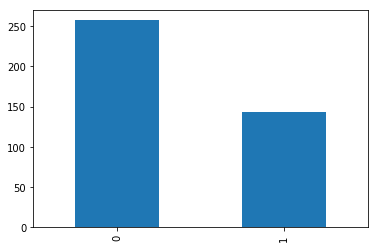

In [10]:
## How many have purchased ?
user_data['Purchased'].value_counts().plot(kind = 'bar')

Its a imbalanced data set with those not purchasing greater than those purchased by 79%

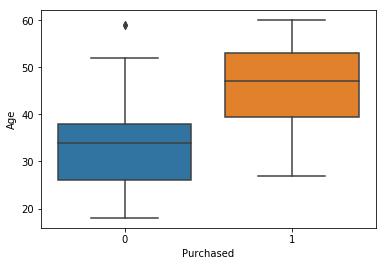

In [11]:
## Observing some data dispersions of variables  based on those purchased or not 
sns.boxplot('Purchased' , 'Age', data = user_data)

Average age of those who purchased is @ 46 years and those who didnt is @ 35 years .

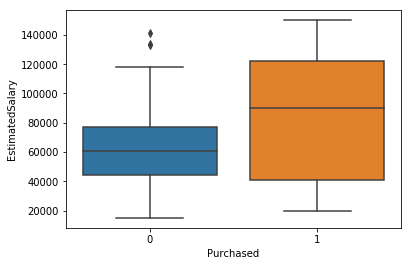

In [15]:
sns.boxplot('Purchased' , 'EstimatedSalary', data = user_data)

Average estimated salary for those who purchased is @90000 and those who didnt is @ 60000.

Text(0.5,1,'Those didnt purchase.')

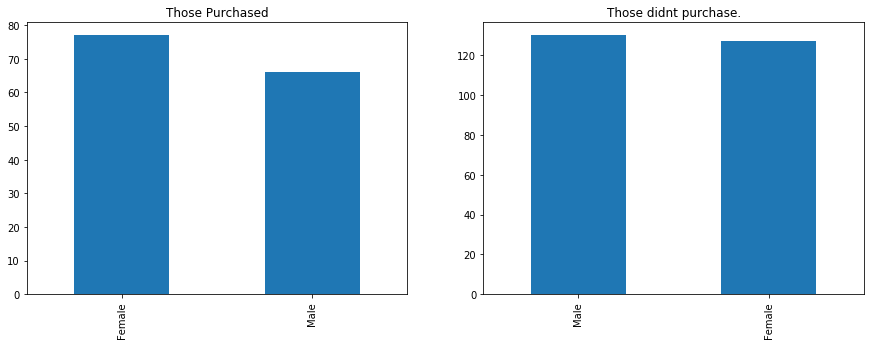

In [27]:
## How many male and female among the buyers ?? 
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
user_data[user_data['Purchased'] == 1]['Gender'].value_counts().plot(kind = 'bar')
plt.title("Those Purchased")
#plt.figure(figsize = (8,5))
plt.subplot(1,2,2)
user_data[user_data['Purchased'] == 0]['Gender'].value_counts().plot(kind = 'bar')
plt.title("Those didnt purchase.")


Female users purchased more than male . Among the non-purchasers, the count of male and female user didnt vary significantly.

In [12]:
## Perform logistic regression.

def perform_logreg(model , X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    
    print("\n Train Score : " + str(model.score(X_train,y_train)))
    train_pred = model.predict(X_train)

    accuracy = np.mean(y_train == train_pred)
    print("Train Accuracy using predicted labels :" + str(accuracy))


    test_pred = model.predict(X_test)
    

    print("Test set score using predicted labels: {:.2f}".format(np.mean(test_pred == y_test)))

    print("Calculated Test set score: {:.2f}".format(model.score(X_test,y_test)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_test,test_pred)))

    print("Confusion matrix :\n{}".format(confusion_matrix(y_test,test_pred)))
    
    print("\n Coefficients {}".format(model.coef_))

    ## Calculate the AUC and plot the ROC curve.
    test_prob = model.predict_proba(X_test)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

In [13]:
## Hot encode the categorical variables .


def hot_encode(df, cols):
    ## Change the categorical columns to dummy variables . 
    
    for c in cols:
        col_dummies = pd.get_dummies(df[c], prefix_sep = "_", prefix = c)
        df = pd.concat([df,col_dummies] , axis = 1)
        df.drop(c , inplace = True , axis = 1)
    return df


 X_train : (320,)

 X_test : (80,)

 y_train : (320,)

 y_test : (80,)

 Train Score : 0.85
Train Accuracy using predicted labels :0.85
Test set score using predicted labels: 0.80
Calculated Test set score: 0.80
Accuracy score :0.800
Confusion matrix :
[[46  5]
 [11 18]]

 Coefficients [[ 0.20301674]]


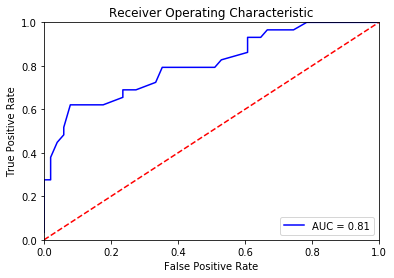

In [44]:
X_train, X_test, y_train, y_test  = train_test_split(user_data['Age'], user_data['Purchased'] , random_state = 1 , test_size = 0.2, stratify = user_data['Purchased'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(C = np.inf, solver = "lbfgs", penalty = "l2")
perform_logreg(lg , X_train,X_test,y_train,y_test )


 X_train : (320, 2)

 X_test : (80, 2)

 y_train : (320,)

 y_test : (80,)

 Train Score : 0.64375
Train Accuracy using predicted labels :0.64375
Test set score using predicted labels: 0.64
Calculated Test set score: 0.64
Accuracy score :0.637
Confusion matrix :
[[51  0]
 [29  0]]

 Coefficients [[ -1.86142633e-09  -2.93400345e-06]]


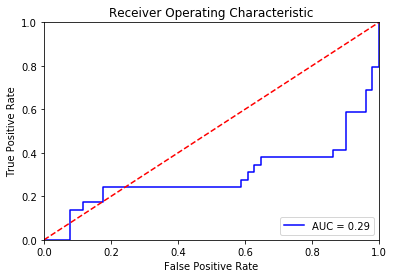

In [46]:
X_train, X_test, y_train, y_test  = train_test_split(user_data[['Age','EstimatedSalary']], user_data['Purchased'] , random_state = 1 , test_size = 0.2, stratify = user_data['Purchased'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))

##
lg = LogisticRegression(C = np.inf, solver = "lbfgs", penalty = "l2")
perform_logreg(lg , X_train,X_test,y_train,y_test )


EstimatedSalary does not improve the model and AUC is very poor.

Check if Gender can improve the predicted accuracy.


 X_train : (320, 3)

 X_test : (80, 3)

 y_train : (320,)

 y_test : (80,)

 Train Score : 0.85
Train Accuracy using predicted labels :0.85
Test set score using predicted labels: 0.80
Calculated Test set score: 0.80
Accuracy score :0.800
Confusion matrix :
[[46  5]
 [11 18]]

 Coefficients [[ 0.20345163 -2.91693523 -2.84997259]]


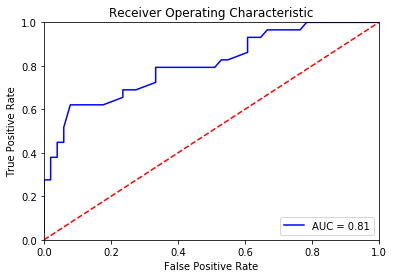

In [47]:
predictors = hot_encode(user_data[['Age','Gender']] , ['Gender'])
X_train, X_test, y_train, y_test  = train_test_split(predictors, user_data['Purchased'] , random_state = 1 , test_size = 0.2, stratify = user_data['Purchased'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))

##
lg = LogisticRegression(C = np.inf, solver = "lbfgs", penalty = "l2")
perform_logreg(lg , X_train,X_test,y_train,y_test )


We see that Age is quite a good estimator for Purchase giving an AUC of 0.81.  
Gender does not increase the accuracy of prediction.  

Add salary_level to the model.


 X_train : (320, 4)

 X_test : (80, 4)

 y_train : (320,)

 y_test : (80,)

 Train Score : 0.871875
Train Accuracy using predicted labels :0.871875
Test set score using predicted labels: 0.86
Calculated Test set score: 0.86
Accuracy score :0.863
Confusion matrix :
[[44  7]
 [ 4 25]]

 Coefficients [[ 0.24287373 -0.26267536 -3.54697637 -3.58326008]]


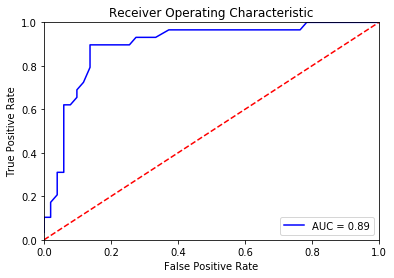

In [32]:
predictors = hot_encode(user_data[['Age','salary_level']] , ['salary_level'])
X_train, X_test, y_train, y_test  = train_test_split(predictors, user_data['Purchased'] , random_state = 1 , test_size = 0.2, stratify = user_data['Purchased'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))

##
lg = LogisticRegression(C = np.inf, solver = "lbfgs", penalty = "l2")
perform_logreg(lg , X_train,X_test,y_train,y_test )


Cross validate with 5 folds. Predictors = Age , Salary level 

In [26]:
kf = StratifiedKFold(n_splits = 6, random_state = 1, shuffle = True)
lg = LogisticRegression()
scores = cross_val_score(lg , predictors,user_data['Purchased'], cv = kf )
predicted = cross_val_predict(lg,predictors,user_data['Purchased'], cv = kf , method = 'predict_proba' )
print(scores)
print("\n Avg AUC score :{}".format(scores.mean()))

[ 0.85074627  0.88059701  0.82089552  0.91044776  0.86567164  0.86153846]

 Avg AUC score :0.8649827784156144


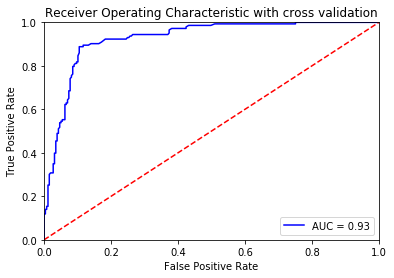

In [27]:
preds = predicted[:,1]
fpr, tpr, thresholds = roc_curve(user_data['Purchased'], preds)
roc_auc = auc(fpr, tpr)
##
## Plot ROC curve.
plt.title('Receiver Operating Characteristic with cross validation')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Get the coefficients of the estimators.  

In [28]:
## Perform a basic logistic regression 
user_mod = sm.logit('Purchased ~ Age' , data = user_data).fit()
print(user_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.420327
         Iterations 7
                        Results: Logit
Model:              Logit            No. Iterations:   7.0000  
Dependent Variable: Purchased        Pseudo R-squared: 0.355   
Date:               2020-05-29 14:40 AIC:              340.2613
No. Observations:   400              BIC:              348.2442
Df Model:           1                Log-Likelihood:   -168.13 
Df Residuals:       398              LL-Null:          -260.79 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -8.0441    0.7842  -10.2581  0.0000  -9.5811  -6.5072
Age         0.1889    0.0192    9.8658  0.0000   0.1514   0.2265



In [37]:
user_mod = sm.logit('Purchased ~ Age + EstimatedSalary' , data = user_data).fit()
print(user_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8
                         Results: Logit
Model:                Logit            No. Iterations:   8.0000  
Dependent Variable:   Purchased        Pseudo R-squared: 0.469   
Date:                 2020-05-29 14:57 AIC:              283.0514
No. Observations:     400              BIC:              295.0258
Df Model:             2                Log-Likelihood:   -138.53 
Df Residuals:         397              LL-Null:          -260.79 
Converged:            1.0000           Scale:            1.0000  
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Intercept       -12.4340   1.2998 -9.5662 0.0000 -14.9815 -9.8865
Age               0.2335   0.0259  9.0128 0.0000   0.1827  0.2843
EstimatedSalary   0.0000   0.0000  6.6127 0.0000   0.0000  0.0000


Estimated Salary can be dropped as shown above as the coefficient is zero .

In [39]:
user_mod = sm.logit('Purchased ~ Age + C(Gender)' , data = user_data).fit()
print(user_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.420177
         Iterations 7
                         Results: Logit
Model:                Logit            No. Iterations:   7.0000  
Dependent Variable:   Purchased        Pseudo R-squared: 0.356   
Date:                 2020-05-29 14:58 AIC:              342.1413
No. Observations:     400              BIC:              354.1157
Df Model:             2                Log-Likelihood:   -168.07 
Df Residuals:         397              LL-Null:          -260.79 
Converged:            1.0000           Scale:            1.0000  
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -8.1154   0.8138 -9.9725 0.0000 -9.7103 -6.5204
C(Gender)[T.Male]  0.0947   0.2735  0.3461 0.7293 -0.4414  0.6308
Age                0.1895   0.0193  9.8421 0.0000  0.1518  0.2273


In [31]:
user_mod = sm.logit('Purchased ~ Age + C(salary_level)' , data = user_data).fit()
print(user_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.333934
         Iterations 7
                             Results: Logit
Model:                  Logit               No. Iterations:      7.0000  
Dependent Variable:     Purchased           Pseudo R-squared:    0.488   
Date:                   2020-06-05 18:37    AIC:                 275.1469
No. Observations:       400                 BIC:                 291.1127
Df Model:               3                   Log-Likelihood:      -133.57 
Df Residuals:           396                 LL-Null:             -260.79 
Converged:              1.0000              Scale:               1.0000  
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                 -6.9548   0.9328 -7.4558 0.0000 -8.7830 -5.1265
C(salary_level)[T.low]    -3.0203   0.45

Probability of User Purchase is given by : 1/(1 + exp(w)) where w is  
-6.9548  + 0.2191*Age -3.0203*salary_level(low) -2.9641*salary_level(medium)